# Sergio Soler Rocha

## 1- Memoria
### 1.1- Los Datos
Los datos proporcionados provienen de la plataforma InsideAirBnB, que se dedica al estudio de todos los aspectos relacionados con alquileres vacacionales. En particular, nos centraremos en los registros del año 2017, donde cada columna de los datos representa una característica de las propiedades de alquiler. A continuación, enumeraremos el significado de cada columna:
- neighbourhood_group: Distrito al que pertenece el alojamiento (categórico).
- neighbourhood: Barrio al que pertenece el alojamiento (categórico).
- latitude: Coordenada de latitud del alojamiento (numérico).
- longitude: Coordenada de longitud del alojamiento (numérico).
- price: Precio del alojamiento por noche (numérico).
- minimum_nights: Número mínimo de noches que se deben reservar para alquilar el alojamiento (numérico).
- number_of_reviews: Cantidad de reseñas realizadas por personas que se han hospedado previamente en el alojamiento (numérico).
- reviews_per_month: Frecuencia de las reseñas realizadas por los usuarios en un mes (numérico).
- calculated_host_listings_count: Cantidad de propiedades que un anfitrión específico tiene disponibles para alquilar en una ubicación o área particular (numérico).
- availability_365: Días disponibles durante un año (numérico).
- room_type: Tipo de habitación, que puede ser compartida, privada o apartamento completo.

### 1.2- Objetivo
El objetivo principal de este proyecto es llevar a cabo una tarea de clasificación en la que se pretende categorizar los datos según el tipo de alojamiento. La información relevante para la clasificación se encuentra contenida en el campo "room_type", el cual actuará como la variable objetivo o etiqueta. El resto de las características presentes en los datos servirán como atributos para llevar a cabo esta clasificación.

Para la implementación inicial del modelo de clasificación, se utilizarán dos algoritmos de máquinas de soporte vectorial (SVM): LinearSVC y SVC. Estos modelos serán entrenados y validados utilizando sus parámetros por defecto. La elección de SVM se debe a su eficacia en problemas de clasificación, especialmente en conjuntos de datos con múltiples clases, como es el caso de este proyecto.

Posteriormente, se llevará a cabo una afinación de hiperparámetros específicamente para el algoritmo SVC. Se empleará el kernel RBF (Radial Basis Function) para modelar relaciones no lineales en los datos. La búsqueda de los mejores valores para los hiperparámetros γ y C se realizará mediante la técnica de GridSearchCV (Validación Cruzada con Grid Search). Esta fase de ajuste de hiperparámetros tiene como objetivo mejorar el rendimiento del modelo SVC y optimizar su capacidad predictiva en el conjunto de datos dado.

La segunda fase de este proyecto se enfocará en la tarea de regresión, con el propósito de predecir el precio por noche (campo "price") como variable dependiente. Las demás características presentes en los datos actuarán como variables independientes en el proceso de modelado.

Para abordar esta tarea, se utilizarán dos algoritmos de máquinas de soporte vectorial (SVM): LinearSVR y SVR. Inicialmente, se entrenarán y evaluarán ambos modelos utilizando sus parámetros por defecto. La elección de SVM para la tarea de regresión se basa en su capacidad para manejar relaciones no lineales y su eficacia en la predicción de valores numéricos.

Posteriormente, se realizará una afinación de hiperparámetros para mejorar el rendimiento del modelo que haya demostrado mejores resultados en la fase anterior de clasificación. Si LinearSVR fue seleccionado, se ajustará el hiperparámetro C mediante 3 búsquedas para encontrar el valor óptimo.

En caso de que SVR haya mostrado un mejor rendimiento en la fase de clasificación, se llevará a cabo la afinación de dos hiperparámetros: γ y C. Se realizarán 2 búsquedas para encontrar los mejores valores que optimicen el rendimiento del modelo SVR en la tarea de regresión.

### 1.3- Analisis estadístico
En total, hay 13321 valores, sin ningún valor nulo. Observamos que solo hay dos atributos categóricos: 'neighbourhood_group' y 'neighbourhood', siendo los demás de tipo numérico. Con la función 'describe', podemos obtener información descriptiva de los atributos numéricos. Se observa que 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month' y 'calculated_host_listings_count' tienen una clara asimetría hacia la derecha.

Al calcular la matriz de correlación lineal, observamos una alta correlación entre 'number_of_reviews' y 'reviews_per_month', algo que intuitivamente podríamos esperar. Esto nos da la posibilidad de eliminar una de las dos columnas al modelar si es necesario.

Después de representar los histogramas de las características numéricas respectivas, observamos que las curvas de 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month' y 'calculated_host_listings_count' tienen una clara asimetría hacia la derecha, mientras que 'latitude' y 'longitude' aparentemente muestran un comportamiento más gaussiano. 'availability_365' se asemeja más a una distribución uniforme, con un pico al inicio y otro al final. Al representar los histogramas por categorías, observamos que 'price' es una característica importante para abordar el problema, ya que, intuitivamente, precios muy altos sugieren la posibilidad de un piso completo. Además, en el histograma correspondiente se evidencia la falta de datos para "Shared room" en comparación con el resto. En relación con 'minimum_nights', el valor máximo identificado es de 1125 días, lo cual podría indicar la necesidad de corregir esta asimetría eliminando algunos valores máximos, ya que no tiene mucho sentido tener valores tan altos para alojamientos vacacionales. Al representar los boxplots de cada característica, se pueden identificar con mayor claridad los valores atípicos que parecen carecer de sentido, especialmente en los casos con los valores más altos de 'minimum_nights'. Por lo tanto, optaremos por eliminar estos valores atípicos al realizar el modelado para mejorar el rendimiento.

Para verificar la correlación entre variables categóricas, usaremos el coeficiente de contingencia, que calcularemos con una tabla de contingencia y la función chi2_contigency. Al calcular el coeficiente de correlación entre 'neighbourhood_group' y 'neighbourhood', obtenemos un valor de 0.9759, muy cercano a uno, lo cual era de esperar, ya que al tratarse de distritos y barrios dentro de una misma ciudad, es normal que estén altamente correlacionados. También calculamos el coeficiente de correlación entre 'neighbourhood' y 'neighbourhood_group' con 'room_type', obteniendo un valor de 0.372 para 'neighbourhood'-'room_type' y 0.301 para 'neighbourhood_group'-'room_type', algo que podríamos tener en cuenta al decidir cuál de las dos eliminar.

Confirmamos definitivamente que las clases están desbalanceadas, ya que 'Entire home/apt' representa el 59.5% de los datos, 'Private room' el 39.06%, y 'Shared room' el 1.44%, siendo esta última la clase desbalanceada.

Observamos también que si utilizamos una escala logarítmica, las distribuciones tienden a tener un comportamiento más parecido a una distribución normal, algo que podría ser beneficioso para algunos modelos. Por lo tanto, decidimos usar esta escala al modelar.

Finalmente, algunas de las características estudiadas presentan valores atípicos, lo que podría afectar al modelar. Especialmente hemos detectado algunos en 'minimum_nights', que podrían estar fuera de la naturaleza del problema. En el apartado de boxplots, vemos que hay algunos por encima de la cantidad de 200. El valor máximo obtenido es de 1125 días, que son más de 3 años; los cuatro valores restantes equivalen a un año. Al tratarse de alquileres vacacionales, pensamos que estos valores están fuera de la naturaleza del problema estudiado, ya que si alguien estuviera interesado en un alquiler con esa cantidad de días, lo más probable es que recurriera a otro tipo de plataformas especializadas en alquileres de larga temporada. Por lo tanto, al crear los modelos, vamos a eliminarlos.

### Primnera parte: Clasificación
### 1.4- Linear SVC
El algoritmo clasificador Linear Support Vector Classifier (LinearSVC) es una variante de las máquinas de soporte vectorial (SVM) diseñada específicamente para la clasificación de datos. A diferencia de la versión estándar de SVM, LinearSVC utiliza un kernel lineal, lo que significa que asume que los datos son linealmente separables en el espacio de características. LinearSVC utiliza un modelo lineal para separar las clases en el espacio de características. Esto significa que busca un hiperplano que pueda dividir eficientemente el espacio en dos regiones, una para cada clase. El objetivo de LinearSVC es encontrar el hiperplano que maximiza el margen entre las clases. El margen se define como la distancia perpendicular desde el hiperplano a los puntos de datos más cercanos de cada clase. Durante el entrenamiento, el algoritmo busca ajustar los pesos y el sesgo del hiperplano para lograr la mejor separación lineal posible entre las clases. LinearSVC también incorpora términos de regularización para controlar el sobreajuste. El parámetro de regularización (denotado como C) controla la fuerza de la regularización. Un valor más alto de C permite que el modelo se ajuste más a los datos de entrenamiento, pero puede aumentar el riesgo de sobreajuste. Es eficiente en términos computacionales y suele funcionar bien en conjuntos de datos linealmente separables o casi linealmente separables. La principal limitación de LinearSVC es su incapacidad para manejar relaciones no lineales entre las características. Si los datos no son linealmente separables, puede ser necesario considerar otros tipos de kernel, como el kernel polinómico o el kernel radial (RBF).


Vamos a eliminar la variable 'neighbourhood' del modelado a partir de ahora debido a la alta correlación que presenta con 'neighbourhood_group'. Hemos aplicado one-hot encoding a las variables categóricas y también hemos aplicado logaritmos a las variables numéricas. En el caso del Support Vector Classifier (SVC), es esencial escalar los datos para lograr un rendimiento óptimo. Por lo tanto, hemos aplicado MaxMinScaler para normalizar todos los datos dentro del intervalo de 0 a 1.

Una vez completado el procesamiento de datos, procedemos a aplicar LinearSVC sin modificar los hiperparámetros por defecto. Hemos utilizado validación cruzada con 10 folds y calculado el promedio del f1_score como métrica de evaluación. El resultado obtenido es de **0.87**, puntuaje muy similar a los que obtuvimos en la primera actividad con K-Nearest-Neighbors y Decision Tree. Sin embargo, al comprobar en las matrices de confusión vemos que el clasificador es incapaz de clasificar la categoría desbalanceada obteniendo un 0% de acierto, confundiendolo en su mayoría con la categoría habitación privada.

### 1.5- SVC (Kernel RBF)
El Support Vector Classifier (SVC) con el kernel Radial Basis Function (RBF) es una variante del algoritmo SVM que permite manejar relaciones no lineales entre las características y las clases en un conjunto de datos. El kernel RBF permite realizar una transformación no lineal de los datos al espacio de características. Esta transformación permite que el modelo SVM encuentre un hiperplano no lineal en el espacio transformado que pueda separar eficientemente las clases. En el caso de SVC con kernel RBF, hay dos parámetros clave que afectan significativamente al rendimiento del modelo:

- Paramétro C: Controla la penalización por error de clasificación. Un valor más alto de C permite un ajuste más preciso a los datos de entrenamiento, pero también puede aumentar el riesgo de sobreajuste.
- Parametro γ: Controla la influencia de cada ejemplo de entrenamiento. Un valor más alto de  γ da como resultado una influencia más localizada y puede conducir a un modelo más sensible a los detalles de los datos.

Durante el entrenamiento, el modelo busca el hiperplano óptimo en el espacio de características transformado para maximizar el margen entre las clases y minimizar la clasificación errónea. El SVC con kernel RBF es efectivo para problemas de clasificación no lineal y es capaz de aprender decisiones más complejas que un modelo lineal. Sin embargo, se debe tener cuidado al ajustar los parámetros C y γ para evitar sobreajuste o subajuste.

Ahora, utilizando el mismo preprocesamiento de datos que en el apartado anterior, aplicamos SVC con el kernel RBF y los parámetros por defecto, obteniendo una puntuación promedio de **0.88**. Esto representa una leve mejora en comparación con LinearSVC. Sin embargo, al igual que ocurría con LinearSVC, el modelo tampoco es capaz de predecir correctamente la clase desbalanceada.

#### 1.5.1- SVC (Kernel RBF) con los hiperparámetros óptimos
En la sección anterior, utilizamos los hiperparámetros por defecto del algoritmo SVC. Ahora, procederemos a realizar una búsqueda de los valores más óptimos para C y γ. Con este fin, hemos definido una cuadrícula de parámetros para explorar las mejores combinaciones de C y γ.

La primera configuración para γ varía en escala logarítmica desde 0.001 hasta 100 en 6 pasos, mientras que la segunda configuración varía linealmente desde 0.1 hasta 2 en 5 pasos. En cuanto a C, la primera configuración abarca valores desde 0.01 hasta 1000 en 6 pasos, mientras que la segunda configuración realiza una búsqueda lineal desde 1 hasta 10 en 5 pasos.

Después del periodo de búsqueda a través de GridSearchCV, obtenemos una puntuación promedio mejorada de **0.89** con los hiperparámetros C = 1000 y γ = 0.1.  Utilizando estos hiperparámetros, entrenamos el modelo SVC y al calcular la puntuación F1, obtenemos un valor de **0.9**. A diferencia de lo observado en los apartados anteriores, ahora el modelo ha sido capaz de predecir algunos valores de la clase desbalanceada, específicamente 6 de un total de 35.

### Segunda Parte: Regresión
### 1.6- LinearSVR
A diferencia de las tareas de clasificación, en problemas de regresión, el objetivo es predecir valores numéricos en lugar de asignar a una clase específica. El objetivo principal de LinearSVR es encontrar un hiperplano en el espacio de características que minimice la suma de las diferencias entre las predicciones y los valores reales de los puntos de datos. La función de pérdida en LinearSVR incluye una penalización para las desviaciones mayores a un cierto umbral (ϵ). Esto introduce una zona de insensibilidad alrededor de la línea de regresión, permitiendo cierta tolerancia para errores menores. Los parámetros del modelo son:

- Parámetro C: Similar a la versión clasificadora, controla la penalización por errores. Un valor más alto de C permite un ajuste más preciso a los datos de entrenamiento, pero también puede aumentar el riesgo de sobreajuste.

- Parámetro ϵ: Especifica el tamaño de la banda de insensibilidad alrededor de la línea de regresión.

LinearSVR es eficiente y suele funcionar bien en conjuntos de datos linealmente separables. Sin embargo, Puede ser menos sensible a outliers en comparación con algunos métodos de regresión lineal tradicionales.

Ahora la variable dependiente pasa a ser 'price' y al igual que hicimos en el apartado de clasificación vamos a prescindir de la variable 'neighbourhood'. La función pérdida que vamos a utilizar es MAE (Mean Absolute Error), que es una métrica comúnmente utilizada para evaluar la precisión de un modelo de regresión. A diferencia del RMSE, el MAE utiliza el valor absoluto de los errores en lugar de elevarlos al cuadrado. Esto hace que la métrica sea menos sensible a la presencia de outliers, ya que los errores más grandes no se magnifican. Al aplicar LinearSVR con los parámetros por defecto obtenemos un valor promedio de MAE de **27.48**.

### 1.7- SVR (Kernel RBF)
 SVR con kernel RBF es un algoritmo de regresión no lineal, que es una extensión de las Máquinas de Vectores de Soporte (SVM) utilizadas para problemas de regresión. SVR busca encontrar una función que se ajuste a los datos de entrenamiento con el menor error posible, permitiendo cierta flexibilidad en términos de "tolerancia" al error. El kernel RBF es una función que mide la similitud entre dos puntos en función de la distancia euclidiana entre ellos. El kernel RBF se utiliza para mapear los datos de entrada a un espacio de características de mayor dimensión. La función de pérdida en SVR busca minimizar el error entre las predicciones del modelo y los valores reales. Los parámetros del modelo son:
 
- Parámetro C: Controla la penalización por errores. Un valor más grande de C permite un ajuste más ajustado a los datos de entrenamiento, pero también puede aumentar el riesgo de sobreajuste.
- Parámetro γ: Controla la influencia de cada ejemplo de entrenamiento. Un valor más pequeño de γ da como resultado una función de decisión más suave, mientras que un valor más grande puede conducir a un ajuste más ajustado.

Durante el entrenamiento, SVR busca encontrar la función de regresión que minimice la función de pérdida, teniendo en cuenta los vectores de soporte y los parámetros de regularización.

Al igual que hicimos en la sección de LinearSVR, utilizamos la función de pérdida MAE y los parámetros C y γ que vienen por defecto. El resultado obtenido es un MAE promedio de **27.24**, ligeramente inferior al que obtuvimos con Linear SVR.

#### 1.7.1- SVC (Kernel RBF) con los hiperparámetros óptimos
En esta sección, buscaremos los hiperparámetros óptimos para el modelo SVR con kernel RBF. La elección de este kernel para la optimización se basa en que obtuvo un resultado ligeramente mejor en comparación con Linear SVR.

Siguiendo la misma metodología que empleamos en la búsqueda de hiperparámetros óptimos para la parte de regresión, utilizaremos dos configuraciones por hiperparámetro. Para γ, la primera configuración variará en escala logarítmica desde 0.001 hasta 100 en 6 pasos, mientras que la segunda configuración variará linealmente desde 0.1 hasta 2 en 5 pasos. En cuanto a C, la primera configuración abarcará valores desde 0.01 hasta 1000 en 6 pasos, mientras que la segunda configuración realizará una búsqueda lineal desde 1 hasta 10 en 5 pasos.

Después del periodo de búsqueda a través de GridSearchCV, obtenemos una pérdida promedio MAE de 25.73, siendo ahora los hiperparámetros óptimos C = 100 y γ = 0.1. Con la optimización de los hiperparámetros, hemos logrado disminuir ligeramente el MAE.

Finalmente, con estos hiperparámetros seleccionamos el modelo más óptimo obtenido y evaluamos su rendimiento en el conjunto de pruebas. El resultado obtenido es un promedio MAE de **23.24**, ligeramente inferior al que obtuvimos en el proceso de entrenamiento con validación cruzada.

### 1.8- Conclusiones
En la sección de clasificación, hemos obtenido puntuaciones de f1 score similares a las que obtuvimos en la primera actividad, tanto para Linear SVC como para SVC con Kernel RBF, siendo este último ligeramente superior. La diferencia más destacada con respecto a los resultados obtenidos utilizando K-Nearest-Neighbors y Decision Tree radica en que el modelo no es capaz de predecir adecuadamente la clase desbalanceada, confundiéndola en la mayoría de los casos con la clase 'private room'. Esta limitación se mejora ligeramente al buscar los hiperparámetros más óptimos para SVC con Kernel RBF, logrando predecir aproximadamente el 17% de los datos de la clase desbalanceada. Aunque este resultado es una mejora con respecto a K-Nearest-Neighbors, sigue estando por debajo del obtenido con Decision Tree. Por otro lado, el algoritmo lineal es más rápido, por lo que, en caso de que los datos aumenten considerablemente, podría ser una opción a tener en cuenta.

En la sección de regresión, al igual que ocurrió con la clasificación, tanto Linear SVR como SVR con Kernel RBF han obtenido un error promedio MAE muy similar, siendo el algoritmo no lineal el que lo ha tenido ligeramente inferior. Debido a esto, escogimos el modelo SVR con Kernel RBF para encontrar los hiperparámetros más óptimos y, tras una larga búsqueda, se consiguió mejorar el rendimiento. Al probar el mejor modelo obtenido en el conjunto de pruebas, incluso mejora la pérdida promedio MAE del entrenamiento con validación cruzada. En general, los resultados obtenidos son aceptables para tener una idea de cuánto puede valer una habitación/piso de alquiler vacacional según las características dadas en la ciudad de Madrid. Al igual que en la sección anterior, el algoritmo lineal se ejecuta con más rapidez y obtiene resultados similares, por lo que, si la cantidad de datos aumentara, podría ser una opción a tener en cuenta para estimar los precios de alquileres vacacionales en Madrid.





## 2 - Importación de los datos

In [1]:
#Importación de las distintas librerías que iremos usando
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import TransformerMixin
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from scipy.stats import chi2_contingency, boxcox
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, f1_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC, SVR, LinearSVR

In [2]:
# Importación de los datos
df = pd.read_csv("input/airbnb.csv")

In [3]:
df.head(10) # Cabecera de los datos

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
2,Moncloa - Aravaca,Argüelles,40.424920,-3.713446,Entire home/apt,40,2,21,0.25,9,195
3,Moncloa - Aravaca,Casa de Campo,40.431027,-3.724586,Entire home/apt,55,2,3,0.13,9,334
4,Latina,Cármenes,40.403410,-3.740842,Private room,16,2,23,0.76,2,250
5,Moncloa - Aravaca,Argüelles,40.423417,-3.712456,Entire home/apt,90,2,43,0.87,9,90
6,Centro,Universidad,40.422022,-3.703954,Entire home/apt,60,3,1,0.03,1,283
7,Centro,Justicia,40.420153,-3.696498,Entire home/apt,100,4,31,0.43,1,232
8,Fuencarral - El Pardo,Peñagrande,40.482185,-3.725684,Private room,21,2,6,0.69,2,249
9,Arganzuela,Legazpi,40.391665,-3.688685,Entire home/apt,100,3,7,0.08,3,365


In [4]:
df.info() # Breve información acerca de la naturaleza de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13321 non-null  object 
 1   neighbourhood                   13321 non-null  object 
 2   latitude                        13321 non-null  float64
 3   longitude                       13321 non-null  float64
 4   room_type                       13321 non-null  object 
 5   price                           13321 non-null  int64  
 6   minimum_nights                  13321 non-null  int64  
 7   number_of_reviews               13321 non-null  int64  
 8   reviews_per_month               13321 non-null  float64
 9   calculated_host_listings_count  13321 non-null  int64  
 10  availability_365                13321 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


En total hay 13321 valores, no habiendo ningún valor nulo, vemos que solo hay dos atributos categóricos, neighbourhood_group y neighbourhood, siendo los restantes de tipo numérico

In [5]:
df.isnull().any() # Comprobamos nuevamente si hay algún valor null 

neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

## 3- Análisis estadístico
En primer lugar usaremos la función **describe** para poder sacar información descriptiva de los atributos numéricos

In [6]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,40.420730,-3.697268,69.171834,3.010885,22.986037,1.520329,7.605885,205.867202
std,0.020344,0.023832,103.721126,12.835619,38.406006,1.852367,19.619972,126.968961
min,40.331888,-3.863907,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.410090,-3.707856,31.000000,1.000000,1.000000,0.110000,1.000000,84.000000
50%,40.418731,-3.701602,53.000000,2.000000,7.000000,0.780000,2.000000,247.000000
75%,40.427997,-3.693818,80.000000,3.000000,28.000000,2.320000,4.000000,321.000000
max,40.562736,-3.526821,7700.000000,1125.000000,446.000000,17.210000,145.000000,365.000000


A simple vista podemos ver que atributos como *price*, *minimum_nights*, *number_of_reviews*, *reviews_per_month*, *calculated_host_listings_count* tienen una clara asimetría a la derecha, más adelante lo confirmaremos haciendo sus correspondientes histogramas

### 3.1- Correlación

In [7]:
# Seleccionamos todas las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

In [8]:
matriz_correlacion

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.230304,0.067039,-0.006643,-0.065644,-0.074515,0.006747,0.037240
longitude,0.230304,1.000000,-0.027859,-0.001292,-0.034922,-0.001742,-0.042298,-0.001541
price,0.067039,-0.027859,1.000000,0.013118,-0.036391,-0.060191,0.077592,0.053527
minimum_nights,-0.006643,-0.001292,0.013118,1.000000,-0.037138,-0.059004,0.028649,0.002265
number_of_reviews,-0.065644,-0.034922,-0.036391,-0.037138,1.000000,0.645368,-0.084468,0.080913
reviews_per_month,-0.074515,-0.001742,-0.060191,-0.059004,0.645368,1.000000,-0.130688,-0.001814
calculated_host_listings_count,0.006747,-0.042298,0.077592,0.028649,-0.084468,-0.130688,1.000000,0.083982
availability_365,0.037240,-0.001541,0.053527,0.002265,0.080913,-0.001814,0.083982,1.000000


Parece que como era de esperar solo hay alta correlación entre las columnas **number_of_reviews** y **number_of_reviews**	

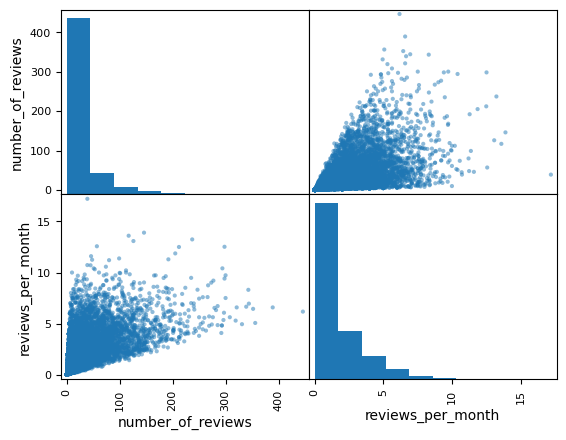

In [9]:
# Scatter plot de number_of_reviews y number_of_reviews y sus histogramas
from pandas.plotting import scatter_matrix

scatter_matrix(df[['number_of_reviews', 'reviews_per_month']])
plt.show()

EL hecho de que halla una clara correlación nos da la posibilidad de poder eliminar una de las dos columnas a la hora de modelar

### 3.2- Histogramas

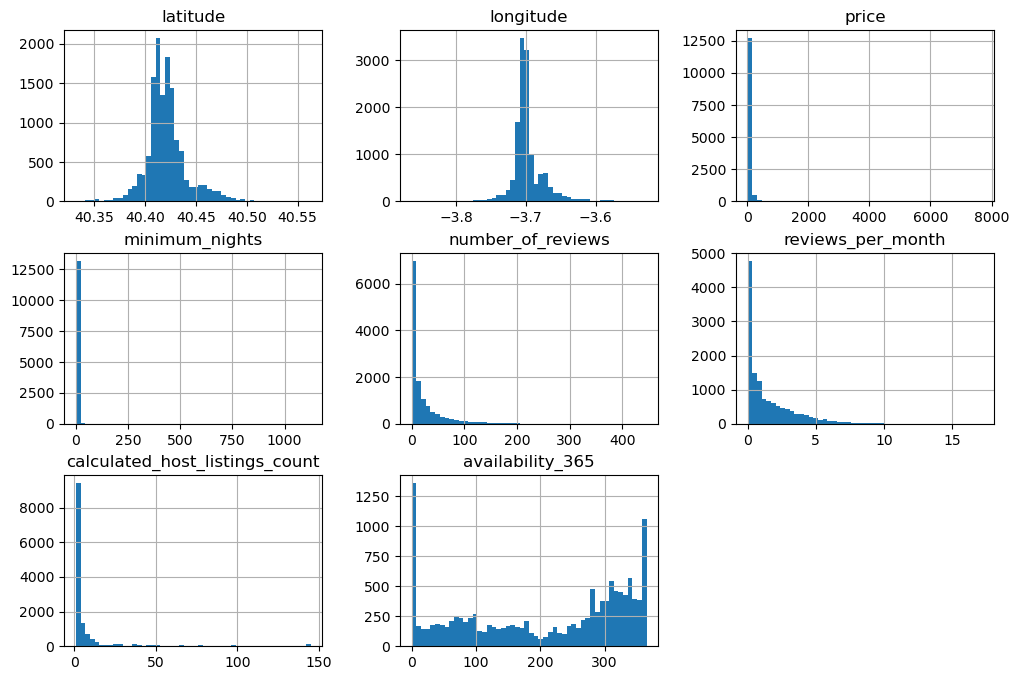

In [10]:
# Histogramas de las variables numéricas
df.hist(bins=50, figsize=(12, 8))
plt.show()

Como habíamos previsto anteriormente, las curvas *price*, *minimum_nights*, *number_of_reviews*, *reviews_per_month*, *calculated_host_listings_count* tienen una clara asimetría a la derecha, mientras que *latitude* y *longitude* si tienen en aparencia un comportamiento más Gaussiano, *availability_365* es más parecido a una distribución uniforme teniendo un pico al inicio y otro al final.

Representaremos ahora por los histogramas y distribuciones de las diferentes características separadas por sus respectivas categorías.

#### Price
Sabiendo que el 75% de los valores están por debajo de 80, cogeremos como valor máximo el número 300 para visualizar mejor las distribuciones por categoría

<Axes: xlabel='price', ylabel='Percent'>

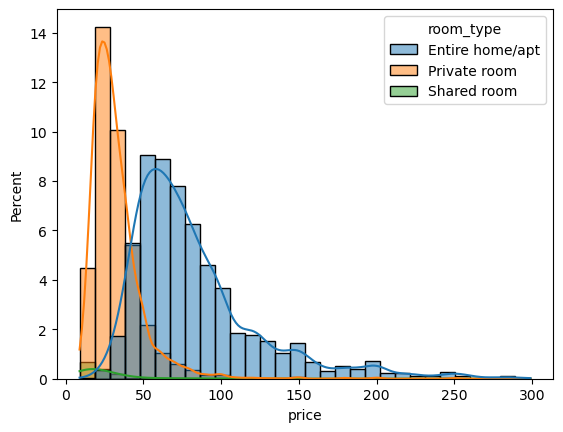

In [11]:
sns.histplot(data = df[df.price < 300], x = 'price', bins = 30, kde = True, hue = 'room_type', stat='percent')

Podemos ver que *price* es una característica importante para tratar el problema, ya que, como uno intuitivamente puede pensar, si los precios son muy altos es más probable que se trate de un piso completo. También ya en el correspondiente histograma se evidencia, como veremos más adelante, la falta de datos correspondientes a "Shared room" en comparación al resto.

#### Latitude

<Axes: xlabel='latitude', ylabel='Percent'>

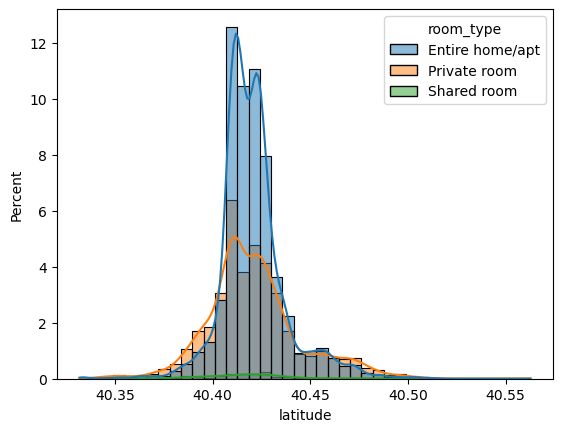

In [12]:
sns.histplot(data = df, x = 'latitude', kde = True, bins = 40, hue = 'room_type', stat='percent')

Tiene a simple vista un comportamiento Gaussiano a estando cada una de ellas centrada en un valor muy parecido.

#### Longitude

<Axes: xlabel='longitude', ylabel='Percent'>

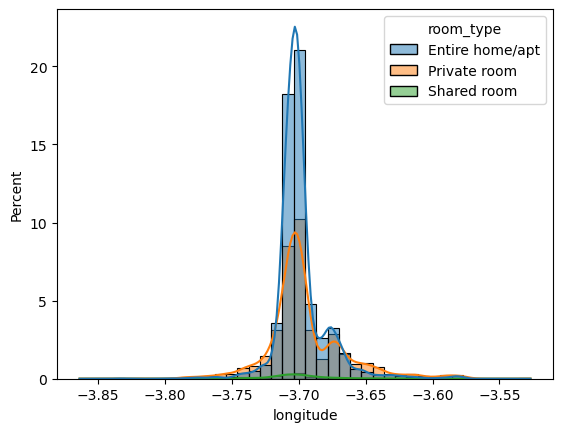

In [13]:
sns.histplot(data = df, x = 'longitude', kde = True, bins = 40, hue = 'room_type', stat='percent')

Comportamiento similar al de *latitude*

#### minimum_nights

<Axes: xlabel='minimum_nights', ylabel='Count'>

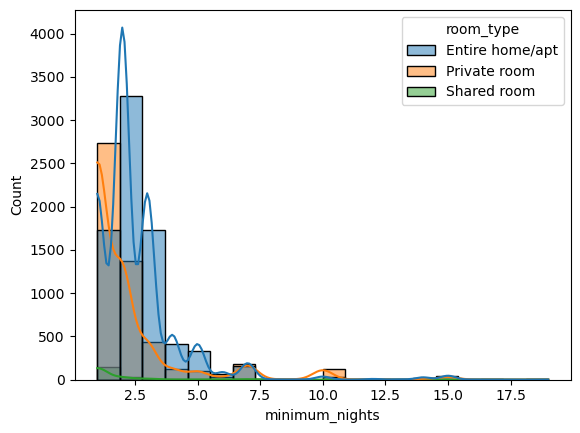

In [14]:
sns.histplot(data = df[df.minimum_nights < 20], x = 'minimum_nights', kde = True, bins = 20, hue = 'room_type')

Hemos visto anteriormente que el valor máximo es de 1125 días, quizás tengamos que arreglar dicha asimetría borrando alguno de los valores máximos, ya que, no tiene mucho sentido apriori un valor tan alto para alojamientos vacacionales.

#### number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='Count'>

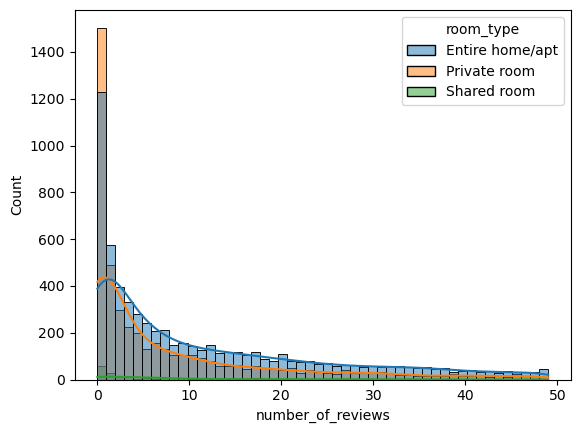

In [15]:
sns.histplot(data = df[df.number_of_reviews < 50], x = 'number_of_reviews', kde = True, bins = 50, hue = 'room_type')

Las tres curvas presentan un comportamiento muy similar

<Axes: xlabel='reviews_per_month', ylabel='Count'>

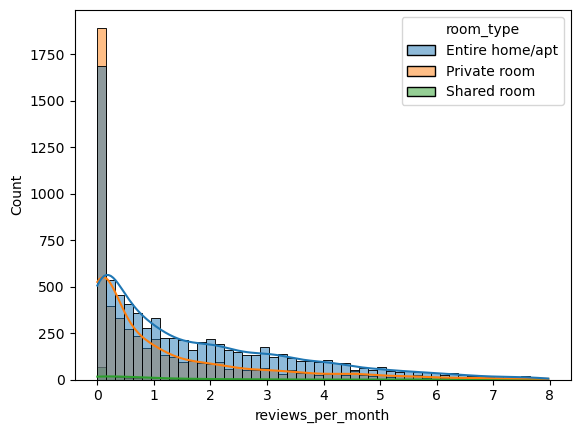

In [16]:
sns.histplot(data = df[df.reviews_per_month<8], x = 'reviews_per_month', kde = True, bins = 50, hue = 'room_type')

Muy similar a la anterior

#### calculated_host_listings_count

<Axes: xlabel='calculated_host_listings_count', ylabel='Count'>

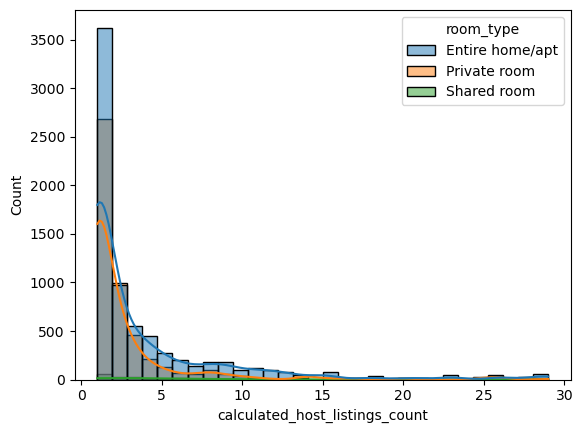

In [17]:
sns.histplot(data = df[df.calculated_host_listings_count < 30], x = 'calculated_host_listings_count', kde = True, bins = 30, hue = 'room_type')

#### availability_365

<Axes: xlabel='availability_365', ylabel='Count'>

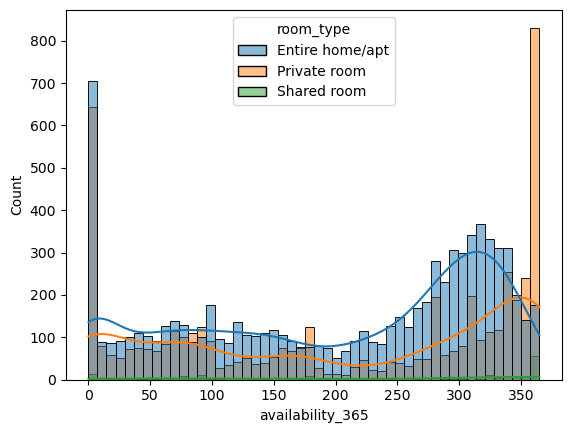

In [18]:
sns.histplot(data = df, x = 'availability_365', kde = True, bins = 50, hue = 'room_type')

Parecen tener una distribución más o menos uniforme con una leve inclinación hacia valores altos

### 3.3 Boxplots

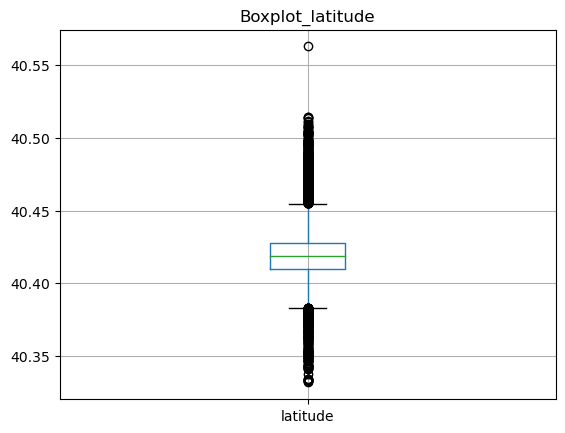

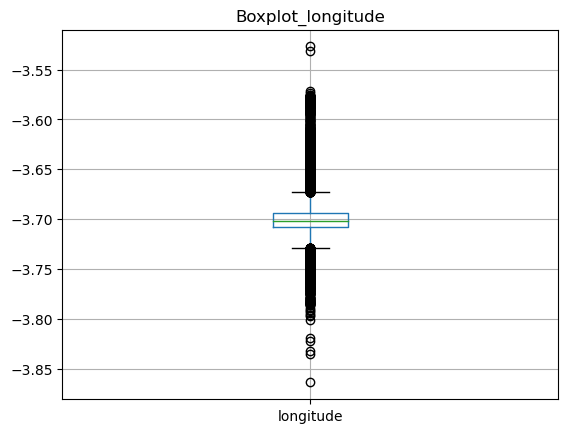

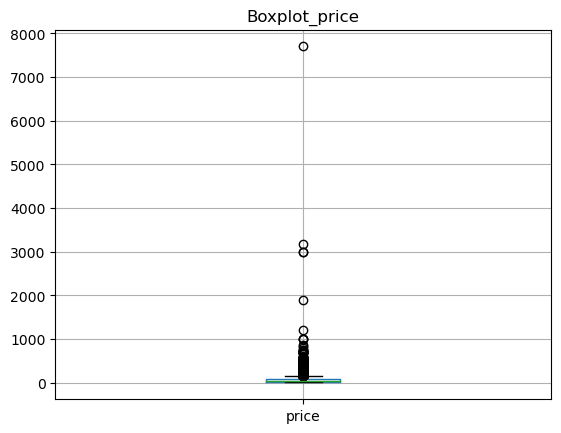

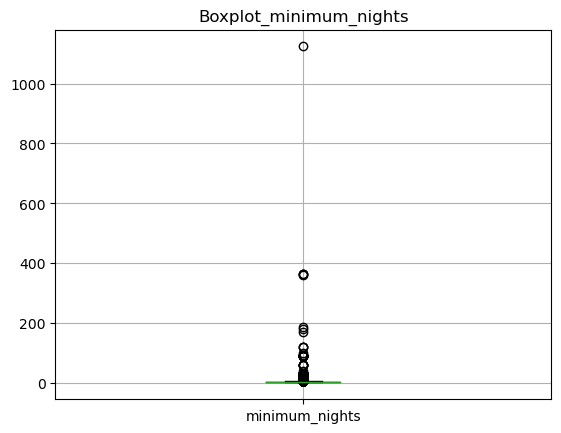

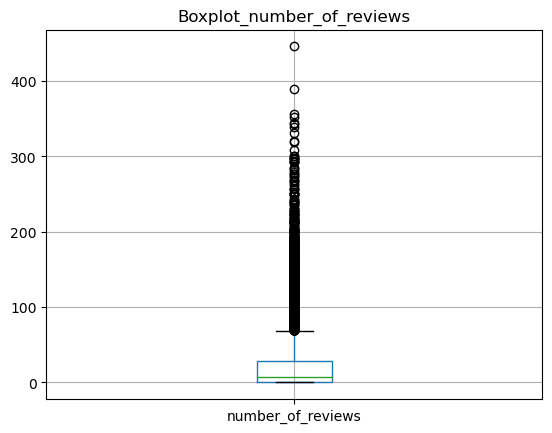

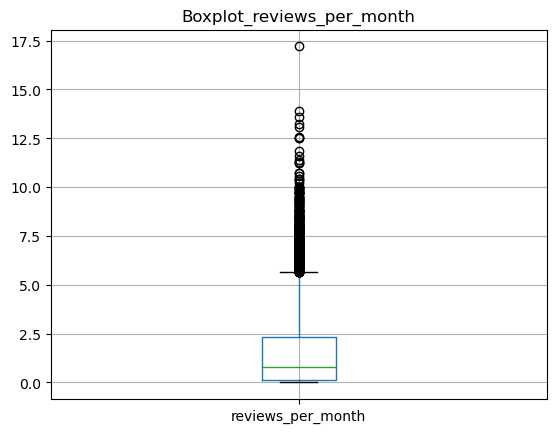

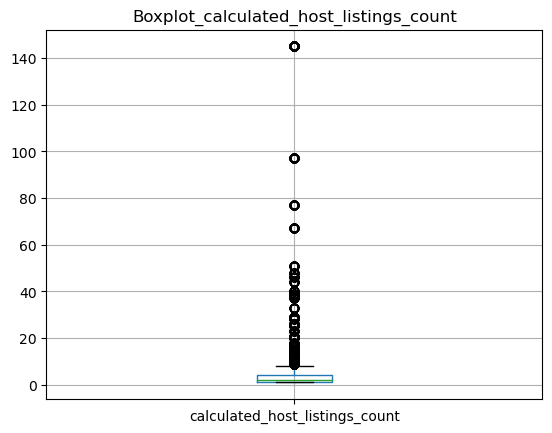

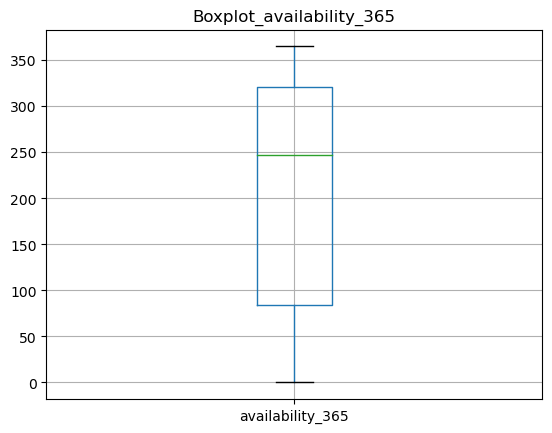

In [19]:
# Represantación de los boxplots de las variables numéricas
columns = df.columns.values

for column in columnas_numericas:
    df.boxplot(column=column)
    plt.title('Boxplot_'+column)
    plt.show()

Observamos que existen algunos valores atípicos que parecen carecer de sentido, especialmente en los casos con los valores más altos de *minimum_nights*. Por lo tanto, optaremos por eliminar estos valores atípicos al momento de realizar el modelado, con el fin de mejorar el rendimiento.

### 3.4- Correlación entre variables categóricas
Para comprobar la correlación entre variables categoricas usaremos el coeficiente de contingencia que lo calcularemos con la ayuda de una tabla de contingencia y con la función **chi2_contigency**. El significado del coeficiente de contingencia es el siguiente:

- Coeficiente cercano a 0: Si el coeficiente de contingencia está cerca de 0, significa que las dos variables categóricas son independientes y no tienen una asociación significativa.

- Coeficiente cercano a 1: Si el coeficiente se acerca a 1, indica una fuerte asociación entre las dos variables categóricas. Esto significa que los valores de una variable tienden a estar relacionados de manera predecible con los valores de la otra variable.

- Coeficiente intermedio: Un valor intermedio entre 0 y 1 indica una asociación moderada. Las dos variables categóricas están relacionadas, pero la relación puede no ser tan fuerte o predecible como en el caso de un coeficiente cercano a 1.

#### neighbourhood - neighbourhood_group

In [20]:
# Creamos una tabla de contingencia
contingency_table = pd.crosstab(df['neighbourhood'], df['neighbourhood_group'])

# Calculamos el coeficiente de contingencia
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Coeficiente de contigencia:", np.sqrt(chi2/(13321 + chi2)))

Coeficiente de contigencia: 0.9759000729485332


Obtenemos un valor muy cercano a uno, lo cual era de esperar, ya que, al tratarse de distritos y barrios dentro de una misma ciudad, es probable que estén altamente correlacionados

#### neighbourhood - room_type

In [21]:
# Creamos una tabla de contingencia
contingency_table = pd.crosstab(df['room_type'], df['neighbourhood'])

# Calculamos el coeficiente de contingencia
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Coeficiente de contigencia:", np.sqrt(chi2/(13321 + chi2)))

Coeficiente de contigencia: 0.3720938065644005


#### neighbourhood_group - room_type

In [22]:
# Creamos una tabla de contingencia
contingency_table = pd.crosstab(df['room_type'], df['neighbourhood_group'])

# Calculamos el coeficiente de contingencia
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Coeficiente de contigencia:", np.sqrt(chi2/(13321 + chi2)))

Coeficiente de contigencia: 0.3014506424584284


Parece que neighbourhood está un poco más correlacionado con room_type que neighbourhood_group, algo que tendremos en cuenta.

Una forma visual de verificar si existe una correlación evidente entre la ubicación de la vivienda y su tipo de habitación es representar las coordenadas de latitud y longitud junto con el tipo de habitación, como si se tratara de un mapa.

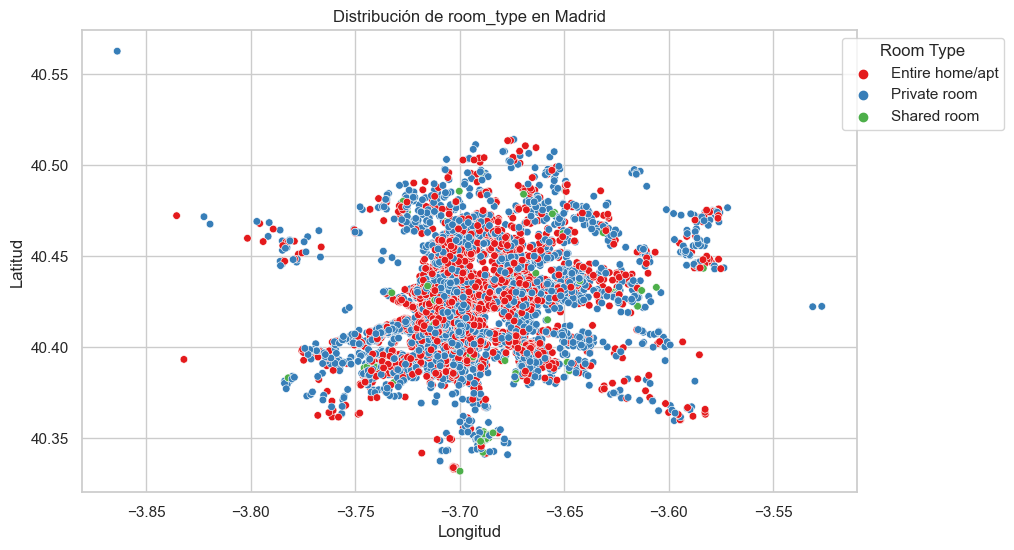

In [23]:
# Representamos longituda y latitud junto con su respectivo tipo de habitación
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df, palette='Set1', s=30)

# Agregamos una leyenda
plt.legend(title='Room Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Distribución de room_type en Madrid')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

A simple vista no se aprecia una correlación tan evidente entre la localización y el tipo de habitación. Lo que si es evidente es la poca cantidad de datos "Shared room" en comparación con las otras dos categorías. Vamos que porcentaje representa cada una:

In [24]:
df.groupby(["room_type"])["room_type"].count()/df["room_type"].count()*100

room_type
Entire home/apt    59.500038
Private room       39.058629
Shared room         1.441333
Name: room_type, dtype: float64

La categoría 'Shared room' representa solo el 1.44 % de los datos, lo que claramente indica un desequilibrio en las categorías. Esto es algo que tendremos en cuenta al crear los modelos correspondientes

### 3.5 Distribuciones logarítmicas
Usar logaritmos en muchas ocasiones puede ayudar a que las distribuciones se parezcan más a una distribución normal, en esta ocasión, hemos visto muchas distribuciones con una clara asimetría, por lo tanto usaremos tranformaciones logaritmicas con el objetivo de acercanos en la medida de lo posible a distribuciones normales. 

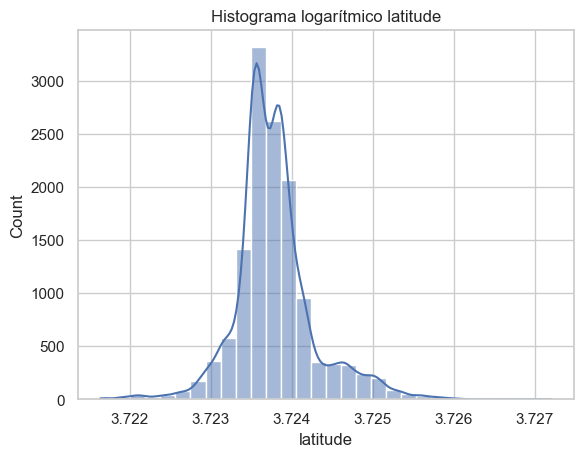

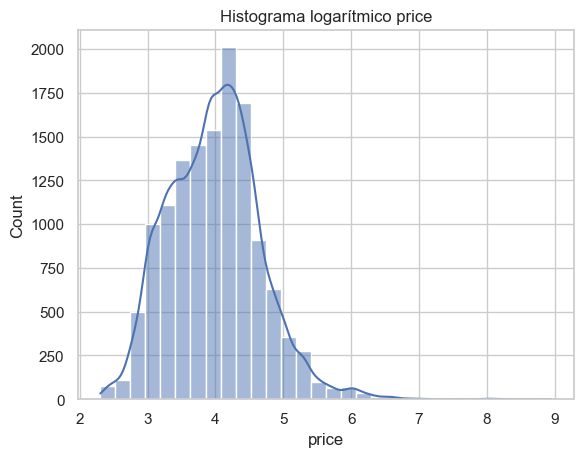

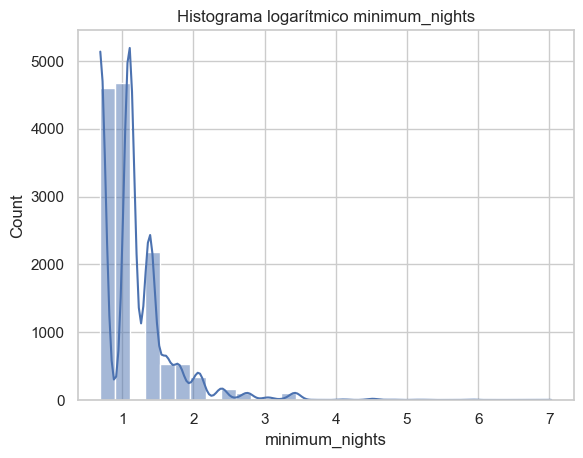

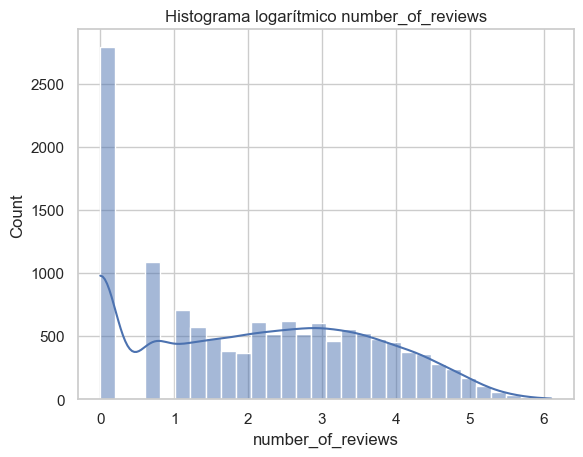

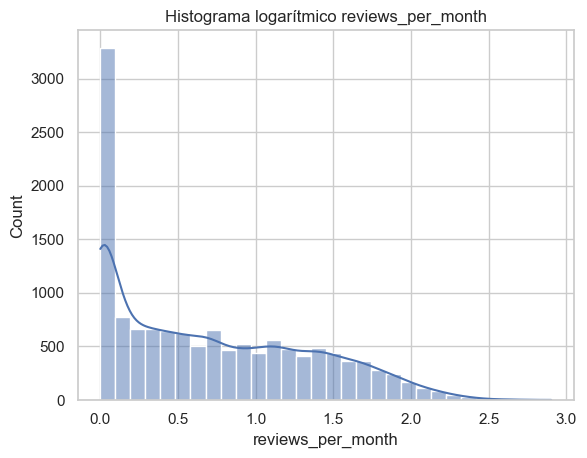

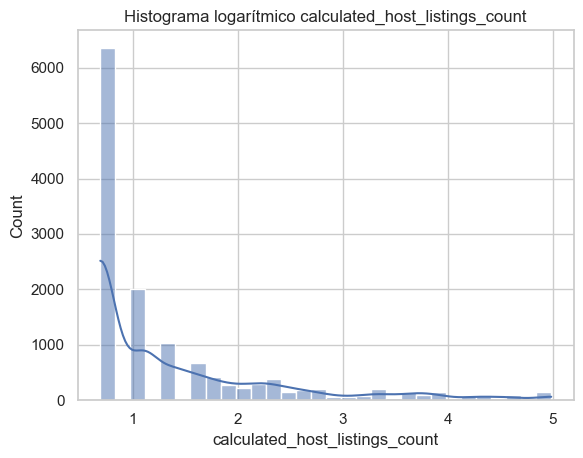

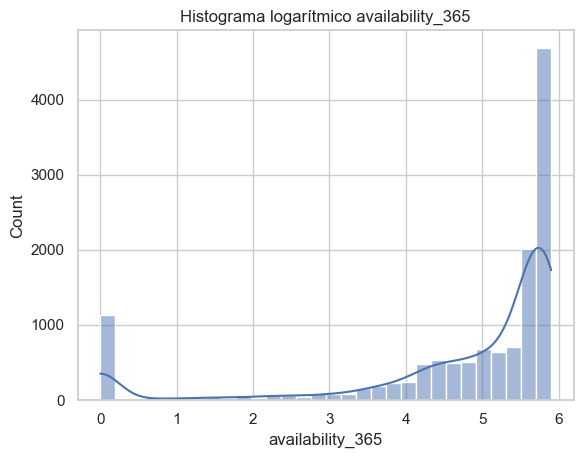

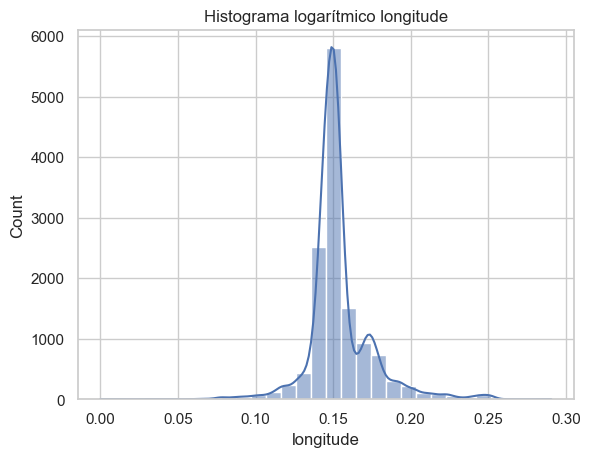

In [25]:
for column in columnas_numericas.drop('longitude', axis = 1): # sacamos longitude por que tiene valores negativos
    sns.histplot(data = np.log1p(df[column]), bins = 30, kde = True)
    plt.title('Histograma logarítmico '+column)
    plt.show()
    
sns.histplot(data = np.log1p(df['longitude']+ abs(df['longitude'].min())), bins = 30, kde = True) # para que sean valores positivos le sumamos a todos los valores el valor absoluto del valor mínimo 
plt.title('Histograma logarítmico '+ 'longitude')
plt.show()

Vemos una mejoría, especialmente en *price*, carácteristica imprescindible a la hora de determinar el tipo de habitación

### 3.6- Tratando los outliers
Algunas de las características estudiadas presentan outliers, algo que podría afectar a la hora de modelar. Especialmente hemos detectado algunos en *minimum_nights* que podrían estar fuera de la naturaleza del problema. En el apartado Boxplots vemos que hay algunos por encima de la cantidad de 200:

In [26]:
df[df.minimum_nights > 200]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
70,Salamanca,Castellana,40.431458,-3.683872,Entire home/apt,280,365,0,0.00,4,358
705,Centro,Palacio,40.417070,-3.708815,Entire home/apt,62,1125,2,0.25,1,0
2166,Usera,Almendrales,40.380981,-3.698861,Private room,23,365,6,0.20,1,358
4267,Puente de Vallecas,Palomeras Sureste,40.389885,-3.641012,Entire home/apt,30,360,27,1.29,1,363
8538,Centro,Palacio,40.410380,-3.709127,Entire home/apt,65,365,1,0.14,1,365


El valor máximo obtenido es de 1125 días, que son más de 3 años, los cuatro valores restantes equivale a un año. Al tratarse de alquileres vacionales pensamos que estos valores están fuera de la naturaleza del problema estudiado, ya que si alguien estuviera interesado en un alquiler con esa cantidad de días, lo más seguro es que recurriera a otro tipo de plataformas especializadas en alquileres de larga temporada, por lo que a la hora de crear los modelos vamos a eliminarlos.

## 4- Clasificación

### 4.1- Creación del conjunto de entrenamiento y de prueba  
A continuación separamos las variables dependiente de las independientes, preparamos a las variables numéricas para que se les puedan pasar el logaritmo y hacemos one hot encoding con las variables categóricas.

In [27]:
# Separaramos las variables dependientes de la independiente 
X = df[df.minimum_nights<200].drop(['room_type', 'neighbourhood'] , axis=1)
y = df[df.minimum_nights<200]['room_type']

In [28]:
# Hacemos esta transformación para evitar logaritmos negativos, es decir, sumandole el valor mínimo
X['longitude'] = X['longitude'] + abs(X['longitude'].min())

In [29]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

In [31]:
columnas_categoricas = df.select_dtypes(include=['object'])
columnas_categoricas.drop(['room_type','neighbourhood'], axis = 1).columns.values

array(['neighbourhood_group'], dtype=object)

In [32]:
categorical_features = columnas_categoricas.drop(['room_type','neighbourhood'], axis = 1).columns.values
numeric_features = columnas_numericas.columns.values

In [33]:
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown = "ignore"))
])

In [ ]:
# Agregamos una transformación logarítmica a las características numéricas
numeric_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=False)),  # Usamos np.log1p para evitar logaritmos de cero
    ('scaler', MinMaxScaler()) # usamos MinMaxScaler() ya que el algoritmo solo trabaja con valores positivos
])

### 4.2- LinearSVC
El algoritmo clasificador Linear Support Vector Classifier (LinearSVC) es una variante de las máquinas de soporte vectorial (SVM) diseñada específicamente para la clasificación de datos. A diferencia de la versión estándar de SVM, LinearSVC utiliza un kernel lineal, lo que significa que asume que los datos son linealmente separables en el espacio de características. LinearSVC utiliza un modelo lineal para separar las clases en el espacio de características. Esto significa que busca un hiperplano que pueda dividir eficientemente el espacio en dos regiones, una para cada clase. El objetivo de LinearSVC es encontrar el hiperplano que maximiza el margen entre las clases. El margen se define como la distancia perpendicular desde el hiperplano a los puntos de datos más cercanos de cada clase. Durante el entrenamiento, el algoritmo busca ajustar los pesos y el sesgo del hiperplano para lograr la mejor separación lineal posible entre las clases. LinearSVC también incorpora términos de regularización para controlar el sobreajuste. El parámetro de regularización (denotado como C) controla la fuerza de la regularización. Un valor más alto de C permite que el modelo se ajuste más a los datos de entrenamiento, pero puede aumentar el riesgo de sobreajuste. Es eficiente en términos computacionales y suele funcionar bien en conjuntos de datos linealmente separables o casi linealmente separables. La principal limitación de LinearSVC es su incapacidad para manejar relaciones no lineales entre las características. Si los datos no son linealmente separables, puede ser necesario considerar otros tipos de kernel, como el kernel polinómico o el kernel radial (RBF).

In [37]:
from sklearn.svm import LinearSVC

# Utilizamos ColumnTransformer para aplicar las transformaciones adecuadas a las columnas correspondientes
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features), 
        ('num', numeric_transformer, numeric_features)
    ])

# Creamos un pipeline completo que incluya la transformación y el modelo
pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', LinearSVC(random_state=42))])

# Definimos la estrategia de validación cruzada con cv=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Realizamos la validación cruzada y calculamos la exactitud
f1_scores = cross_val_score(pipeline1, X_train, y_train, cv=kf, scoring='f1_weighted', error_score='raise')

# Imprimimos los resultados
print("f1_score por fold:")
for i, score in enumerate(f1_scores, 1):
    print(f"Fold {i}: {score:.2f}")

print(f"f1 promedio: {f1_scores.mean():.2f}")


C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
 

f1_score por fold:
Fold 1: 0.86
Fold 2: 0.88
Fold 3: 0.85
Fold 4: 0.85
Fold 5: 0.87
Fold 6: 0.88
Fold 7: 0.87
Fold 8: 0.86
Fold 9: 0.88
Fold 10: 0.87
f1 promedio: 0.87


C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [38]:
# Realizamos predicciones 
predicted = cross_val_predict(pipeline1, X_train, y_train, cv=kf)

# Calculamos la matriz de confusión normalizada para cada pliegue
normalized_conf_matrices = []
for train_index, test_index in kf.split(X_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Entrenamos el modelo en el fold actual
    pipeline1.fit(X_fold_train, y_fold_train)
    
    # Realizamos predicciones en el fold actual
    fold_predicted = pipeline1.predict(X_fold_test)
    
    # Calculamos la matriz de confusión normalizada para este fold
    conf_matrix = confusion_matrix(y_fold_test, fold_predicted)
    normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]  # Normalización
    normalized_conf_matrices.append(normalized_conf_matrix)

# Imprimimos las matrices de confusión normalizadas por fold
print("Matrices de Confusión Normalizadas por fold:")
for i, normalized_conf_matrix in enumerate(normalized_conf_matrices, 1):
    print(f"Fold {i}:")
    print(normalized_conf_matrix)
    

# Calculamos la matriz de confusión promedio
combined_conf_matrix_normalized = sum(normalized_conf_matrices)/i
print("Matriz de Confusión promedio:")
print(np.round(combined_conf_matrix_normalized, decimals=3))

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
 

Matrices de Confusión Normalizadas por fold:
Fold 1:
[[0.90909091 0.09090909 0.        ]
 [0.17067308 0.82932692 0.        ]
 [0.25       0.75       0.        ]]
Fold 2:
[[0.92857143 0.07142857 0.        ]
 [0.17171717 0.82828283 0.        ]
 [0.         1.         0.        ]]
Fold 3:
[[0.93174603 0.06825397 0.        ]
 [0.215311   0.784689   0.        ]
 [0.11764706 0.88235294 0.        ]]
Fold 4:
[[0.92088608 0.07911392 0.        ]
 [0.19711538 0.80288462 0.        ]
 [0.05882353 0.94117647 0.        ]]
Fold 5:
[[0.94173228 0.05826772 0.        ]
 [0.18337408 0.81662592 0.        ]
 [0.0952381  0.9047619  0.        ]]
Fold 6:
[[0.94191523 0.05808477 0.        ]
 [0.17183771 0.82816229 0.        ]
 [0.22222222 0.77777778 0.        ]]
Fold 7:
[[0.91601866 0.08398134 0.        ]
 [0.13613861 0.86386139 0.        ]
 [0.11111111 0.88888889 0.        ]]
Fold 8:
[[0.92261002 0.07738998 0.        ]
 [0.1640625  0.8359375  0.        ]
 [0.09090909 0.90909091 0.        ]]
Fold 9:
[[0.9278846

 ### 4.3- SVC (Kernel RGB)
 El Support Vector Classifier (SVC) con el kernel Radial Basis Function (RBF) es una variante del algoritmo SVM que permite manejar relaciones no lineales entre las características y las clases en un conjunto de datos. El kernel RBF permite realizar una transformación no lineal de los datos al espacio de características. Esta transformación permite que el modelo SVM encuentre un hiperplano no lineal en el espacio transformado que pueda separar eficientemente las clases. En el caso de SVC con kernel RBF, hay dos parámetros clave que afectan significativamente al rendimiento del modelo:

- Paramétro C: Controla la penalización por error de clasificación. Un valor más alto de C permite un ajuste más preciso a los datos de entrenamiento, pero también puede aumentar el riesgo de sobreajuste.
- Parametro γ: Controla la influencia de cada ejemplo de entrenamiento. Un valor más alto de  γ da como resultado una influencia más localizada y puede conducir a un modelo más sensible a los detalles de los datos.

Durante el entrenamiento, el modelo busca el hiperplano óptimo en el espacio de características transformado para maximizar el margen entre las clases y minimizar la clasificación errónea. El SVC con kernel RBF es efectivo para problemas de clasificación no lineal y es capaz de aprender decisiones más complejas que un modelo lineal. Sin embargo, se debe tener cuidado al ajustar los parámetros C y γ para evitar sobreajuste o subajuste.

In [42]:
from sklearn.svm import SVC

# Creamos un pipeline completo que incluya la transformación y el modelo
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf',  SVC(kernel='rbf', random_state=42))])

# Definimos la estrategia de validación cruzada con cv=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Realizamos la validación cruzada y calculamos la exactitud
f1_scores = cross_val_score(pipeline2, X_train, y_train, cv=kf, scoring='f1_weighted', error_score='raise')

# Imprimimos los resultados
print("f1_score por fold:")
for i, score in enumerate(f1_scores, 1):
    print(f"Fold {i}: {score:.2f}")

print(f"f1 promedio: {f1_scores.mean():.2f}")


C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

f1_score por fold:
Fold 1: 0.87
Fold 2: 0.89
Fold 3: 0.87
Fold 4: 0.87
Fold 5: 0.87
Fold 6: 0.90
Fold 7: 0.88
Fold 8: 0.87
Fold 9: 0.89
Fold 10: 0.88
f1 promedio: 0.88


In [43]:
# Realizamos predicciones 
predicted = cross_val_predict(pipeline2, X_train, y_train, cv=kf)

# Calculamos la matriz de confusión normalizada para cada pliegue
normalized_conf_matrices = []
for train_index, test_index in kf.split(X_train):
    X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Entrenamos el modelo en el fold actual
    pipeline2.fit(X_fold_train, y_fold_train)
    
    # Realizamos predicciones en el fold actual
    fold_predicted = pipeline2.predict(X_fold_test)
    
    # Calculamos la matriz de confusión normalizada para este fold
    conf_matrix = confusion_matrix(y_fold_test, fold_predicted)
    normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]  # Normalización
    normalized_conf_matrices.append(normalized_conf_matrix)

# Imprimimos las matrices de confusión normalizadas por fold
print("Matrices de Confusión Normalizadas por fold:")
for i, normalized_conf_matrix in enumerate(normalized_conf_matrices, 1):
    print(f"Fold {i}:")
    print(normalized_conf_matrix)
    

# Calculamos la matriz de confusión promedio
combined_conf_matrix_normalized = sum(normalized_conf_matrices)/i
print("Matriz de Confusión promedio:")
print(np.round(combined_conf_matrix_normalized, decimals=3))

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

Matrices de Confusión Normalizadas por fold:
Fold 1:
[[0.9184953  0.0815047  0.        ]
 [0.15384615 0.84615385 0.        ]
 [0.25       0.75       0.        ]]
Fold 2:
[[0.93617021 0.06382979 0.        ]
 [0.1540404  0.8459596  0.        ]
 [0.         1.         0.        ]]
Fold 3:
[[0.93968254 0.06031746 0.        ]
 [0.18660287 0.81339713 0.        ]
 [0.11764706 0.88235294 0.        ]]
Fold 4:
[[0.94303797 0.05696203 0.        ]
 [0.18269231 0.81730769 0.        ]
 [0.05882353 0.94117647 0.        ]]
Fold 5:
[[0.94173228 0.05826772 0.        ]
 [0.16381418 0.83618582 0.        ]
 [0.0952381  0.9047619  0.        ]]
Fold 6:
[[0.95604396 0.04395604 0.        ]
 [0.14797136 0.85202864 0.        ]
 [0.22222222 0.77777778 0.        ]]
Fold 7:
[[0.93001555 0.06998445 0.        ]
 [0.13613861 0.86386139 0.        ]
 [0.11111111 0.88888889 0.        ]]
Fold 8:
[[0.92716237 0.07283763 0.        ]
 [0.1484375  0.8515625  0.        ]
 [0.09090909 0.90909091 0.        ]]
Fold 9:
[[0.9294871

### 4.4- SVC (Kernel RBF) con los hiperparámetros óptimos
En la sección anterior, utilizamos los hiperparámetros por defecto del algoritmo SVC. Ahora, procederemos a realizar una búsqueda de los valores más óptimos para C y γ. Con este fin, hemos definido una cuadrícula de parámetros para explorar las mejores combinaciones de C y γ.

La primera configuración para γ varía en escala logarítmica desde 0.001 hasta 100 en 6 pasos, mientras que la segunda configuración varía linealmente desde 0.1 hasta 2 en 5 pasos. En cuanto a C, la primera configuración abarca valores desde 0.01 hasta 1000 en 6 pasos, mientras que la segunda configuración realiza una búsqueda lineal desde 1 hasta 10 en 5 pasos.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Definimos los parámetros a buscar: γ y C
param_grid = [
    {'clf__gamma': np.logspace(-3, 2, 6), 'clf__C': np.logspace(-2, 3, 6)},
    {'clf__gamma': np.linspace(0.1, 2, 5), 'clf__C': np.linspace(1, 10, 5)}
]

# Creamos un nuevo pipeline para SVC con preprocesamiento y modelo SVC
pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', SVC(kernel='rbf', random_state=42))])

# Realizamos la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(pipeline_svc, param_grid, cv=kf, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros encontrados y el mejor puntaje
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor f1 weighted score: {grid_search.best_score_:.2f}")


C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

Mejores parámetros encontrados:
{'clf__C': 1000.0, 'clf__gamma': 0.1}
Mejor f1 weighted score: 0.89


#### 4.4.1- Resultados en el conjunto de pruebas

In [41]:
from sklearn.metrics import confusion_matrix, f1_score


# Obtenemos el mejor modelo después de la búsqueda de hiperparámetros
best_model = grid_search.best_estimator_

# Hacemos predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calculamos el f1_score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimimos la matriz de confusión
print(f"F1 Score con los mejores parámetros: {f1:.2f}")
print("Matriz de Confusión:")
print(conf_matrix)


F1 Score con los mejores parámetros: 0.90
Matriz de Confusión:
[[1493   85    0]
 [ 139  912    0]
 [   2   27    6]]


## 5- Regresión
### 5.1- Creación del conjunto de entrenamiento y de prueba  
A continuación separamos las variables dependiente de las independientes, preparamos a las variables numéricas para que se les puedan pasar el logaritmo y hacemos one hot encoding con las variables categóricas.

In [44]:
# Separaramos las variables dependientes de la independiente 
X = df[df.minimum_nights<200].drop(['price', 'neighbourhood'] , axis=1)
y = df[df.minimum_nights<200]['price']

In [45]:
# Hacemos esta transformación para evitar logaritmos negativos, es decir, sumandole el valor mínimo
X['longitude'] = X['longitude'] + abs(X['longitude'].min())

In [46]:
columnas_categoricas = df.select_dtypes(include=['object'])
columnas_categoricas.columns.values
columnas_numericas = df.select_dtypes(include=['int64', 'float64'])

In [47]:
categorical_features = columnas_categoricas.drop(['neighbourhood'], axis=1).columns.values
numeric_features = columnas_numericas.drop(['price'], axis=1).columns.values

In [48]:
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown = "ignore"))
])

In [50]:
# Agregamos una transformación logarítmica a las variables numéricas
numeric_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=False)),  # Usamos np.log1p para evitar logaritmos de cero
    ('scaler', StandardScaler()) 
])

In [51]:
# Utilizamos ColumnTransformer para aplicar las transformaciones adecuadas a las columnas correspondientes
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features), #la desactivamos porque en este caso particular no hay variables categóricas
        ('num', numeric_transformer, numeric_features)
    ])

### 5.2- LinearSVR

A diferencia de las tareas de clasificación, en problemas de regresión, el objetivo es predecir valores numéricos en lugar de asignar a una clase específica. El objetivo principal de LinearSVR es encontrar un hiperplano en el espacio de características que minimice la suma de las diferencias entre las predicciones y los valores reales de los puntos de datos. La función de pérdida en LinearSVR incluye una penalización para las desviaciones mayores a un cierto umbral (ϵ). Esto introduce una zona de insensibilidad alrededor de la línea de regresión, permitiendo cierta tolerancia para errores menores. Los parámetros del modelo son:

- Parámetro C: Similar a la versión clasificadora, controla la penalización por errores. Un valor más alto de C permite un ajuste más preciso a los datos de entrenamiento, pero también puede aumentar el riesgo de sobreajuste.

- Parámetro ϵ: Especifica el tamaño de la banda de insensibilidad alrededor de la línea de regresión.

LinearSVR es eficiente y suele funcionar bien en conjuntos de datos linealmente separables. Sin embargo, Puede ser menos sensible a outliers en comparación con algunos métodos de regresión lineal tradicionales.

In [55]:
from sklearn.metrics import mean_absolute_error

# Creamos un pipeline completo que incluya la transformación y el modelo
pipeline_reg1 = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('clf', LinearSVR(random_state=42))])

# Definimos la estrategia de validación cruzada con cv=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Usaremos neg_mean_absolute_error para la métrica de evaluación
neg_mae_scores = cross_val_score(pipeline_reg1, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error', error_score='raise')

# Convertimos la métrica a MAE (Mean Absolute Error) para interpretación
mae_scores = -neg_mae_scores

# Imprimimos los resultados
print("MAE por fold:")
for i, score in enumerate(mae_scores, 1):
    print(f"Fold {i}: {score:.2f}")

print(f"MAE promedio: {mae_scores.mean():.2f}")

# Calculamos el rango de la variable objetivo
target_range = y_train.max() - y_train.min()
print(f"Rango de la variable objetivo: {target_range:.2f}")

# Calculamos el porcentaje relativo del MAE con respecto al rango de la variable objetivo
relative_mae_percentage = (mae_scores.mean() / target_range) * 100
print(f"MAE relativo al rango de la variable objetivo: {relative_mae_percentage:.2f}%")


C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
 

MAE por fold:
Fold 1: 26.31
Fold 2: 27.35
Fold 3: 27.97
Fold 4: 26.90
Fold 5: 29.14
Fold 6: 23.97
Fold 7: 34.49
Fold 8: 27.95
Fold 9: 25.25
Fold 10: 25.42
MAE promedio: 27.48
Rango de la variable objetivo: 7691.00
MAE relativo al rango de la variable objetivo: 0.36%


### 5.3- SVR (Kernel RBF)
 SVR con kernel RBF es un algoritmo de regresión no lineal, que es una extensión de las Máquinas de Vectores de Soporte (SVM) utilizadas para problemas de regresión. SVR busca encontrar una función que se ajuste a los datos de entrenamiento con el menor error posible, permitiendo cierta flexibilidad en términos de "tolerancia" al error. El kernel RBF es una función que mide la similitud entre dos puntos en función de la distancia euclidiana entre ellos. El kernel RBF se utiliza para mapear los datos de entrada a un espacio de características de mayor dimensión. La función de pérdida en SVR busca minimizar el error entre las predicciones del modelo y los valores reales. Los parámetros del modelo son:
 
- Parámetro C: Controla la penalización por errores. Un valor más grande de C permite un ajuste más ajustado a los datos de entrenamiento, pero también puede aumentar el riesgo de sobreajuste.
- Parámetro γ: Controla la influencia de cada ejemplo de entrenamiento. Un valor más pequeño de γ da como resultado una función de decisión más suave, mientras que un valor más grande puede conducir a un ajuste más ajustado.

Durante el entrenamiento, SVR busca encontrar la función de regresión que minimice la función de pérdida, teniendo en cuenta los vectores de soporte y los parámetros de regularización.

In [56]:
# Creamos un pipeline completo que incluya la transformación y el modelo
pipeline_reg2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', SVR(kernel='rbf'))])

# Definimos la estrategia de validación cruzada con cv=10
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Usaremos neg_mean_absolute_error para la métrica de evaluación
neg_mae_scores = cross_val_score(pipeline_reg2, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error', error_score='raise')

# Convertimos la métrica a MAE (Mean Absolute Error) para interpretación
mae_scores = -neg_mae_scores

# Imprimimos los resultados
print("MAE por fold:")
for i, score in enumerate(mae_scores, 1):
    print(f"Fold {i}: {score:.2f}")

print(f"MAE promedio: {mae_scores.mean():.2f}")

# Calculamos el rango de la variable objetivo
target_range = y_train.max() - y_train.min()
print(f"Rango de la variable objetivo: {target_range:.2f}")

# Calculamos el porcentaje relativo del MAE con respecto al rango de la variable objetivo
relative_mae_percentage = (mae_scores.mean() / target_range) * 100
print(f"MAE relativo al rango de la variable objetivo: {relative_mae_percentage:.2f}%")

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

MAE por fold:
Fold 1: 25.90
Fold 2: 27.31
Fold 3: 27.69
Fold 4: 26.63
Fold 5: 28.83
Fold 6: 23.90
Fold 7: 34.34
Fold 8: 27.93
Fold 9: 24.78
Fold 10: 25.08
MAE promedio: 27.24
Rango de la variable objetivo: 7691.00
MAE relativo al rango de la variable objetivo: 0.35%


### 5.4- SVC (Kernel RBF) con los hiperparámetros óptimos

En esta sección, buscaremos los hiperparámetros óptimos para el modelo SVR con kernel RBF. La elección de este kernel para la optimización se basa en que obtuvo un resultado ligeramente mejor en comparación con Linear SVR.

Siguiendo la misma metodología que empleamos en la búsqueda de hiperparámetros óptimos para la parte de regresión, utilizaremos dos configuraciones por hiperparámetro. Para γ, la primera configuración variará en escala logarítmica desde 0.001 hasta 100 en 6 pasos, mientras que la segunda configuración variará linealmente desde 0.1 hasta 2 en 5 pasos. En cuanto a C, la primera configuración abarcará valores desde 0.01 hasta 1000 en 6 pasos, mientras que la segunda configuración realizará una búsqueda lineal desde 1 hasta 10 en 5 pasos.

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# Definir los parámetros a buscar: γ y C
param_grid = [
    {'clf__gamma': np.logspace(-3, 2, 6), 'clf__C': np.logspace(-2, 3, 6)},
    {'clf__gamma': np.linspace(0.1, 2, 5), 'clf__C': np.linspace(1, 10, 5)}
]

# Crear un nuevo pipeline para SVR con preprocesamiento y modelo SVR
pipeline_reg = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', SVR(kernel='rbf'))])

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(pipeline_reg, param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados y el mejor puntaje
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print(f"Mejor MAE: {-grid_search.best_score_:.2f}")

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\soler\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

Mejores parámetros encontrados:
{'clf__C': 100.0, 'clf__gamma': 0.1}
Mejor MAE: 25.73


In [63]:
from sklearn.metrics import mean_absolute_error

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Precisión del modelo con los mejores hiperparámetros: {mae_test:.2f}')


Precisión del modelo con los mejores hiperparámetros: 23.24


## 6- Conclusiones
En la sección de clasificación, hemos obtenido puntuaciones de f1 score similares a las que obtuvimos en la primera actividad, tanto para Linear SVC como para SVC con Kernel RBF, siendo este último ligeramente superior. La diferencia más destacada con respecto a los resultados obtenidos utilizando K-Nearest-Neighbors y Decision Tree radica en que el modelo no es capaz de predecir adecuadamente la clase desbalanceada, confundiéndola en la mayoría de los casos con la clase 'private room'. Esta limitación se mejora ligeramente al buscar los hiperparámetros más óptimos para SVC con Kernel RBF, logrando predecir aproximadamente el 17% de los datos de la clase desbalanceada. Aunque este resultado es una mejora con respecto a K-Nearest-Neighbors, sigue estando por debajo del obtenido con Decision Tree. Por otro lado, el algoritmo lineal es más rápido, por lo que, en caso de que los datos aumenten considerablemente, podría ser una opción a tener en cuenta.

En la sección de regresión, al igual que ocurrió con la clasificación, tanto Linear SVR como SVR con Kernel RBF han obtenido un error promedio MAE muy similar, siendo el algoritmo no lineal el que lo ha tenido ligeramente inferior. Debido a esto, escogimos el modelo SVR con Kernel RBF para encontrar los hiperparámetros más óptimos y, tras una larga búsqueda, se consiguió mejorar el rendimiento. Al probar el mejor modelo obtenido en el conjunto de pruebas, incluso mejora la pérdida promedio MAE del entrenamiento con validación cruzada. En general, los resultados obtenidos son aceptables para tener una idea de cuánto puede valer una habitación/piso de alquiler vacacional según las características dadas en la ciudad de Madrid. Al igual que en la sección anterior, el algoritmo lineal se ejecuta con más rapidez y obtiene resultados similares, por lo que, si la cantidad de datos aumentara, podría ser una opción a tener en cuenta para estimar los precios de alquileres vacacionales en Madrid.